In [1]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu

import sys
sys.path.append('/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/src')

from src.utils import *
from src.kernels import Kernel
init_notebook_mode(connected=True) ## plotly init

import os
path_data = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/data/"

In [2]:
df_hr = pd.read_csv(path_data + 'HRVProcessedData[[Beat]].csv')

In [5]:
df_hr.head(), df_hr.columns, df_hr.shape

(   Unnamed: 0   Time        niHR        RR
 0           1  0.000  182.926773  328.0001
 1           2  0.328  182.926773  328.0001
 2           3  0.716  154.639375  387.9995
 3           4  1.124  147.058679  408.0004
 4           5  1.500  159.574468  376.0000,
 Index(['Unnamed: 0', 'Time', 'niHR', 'RR'], dtype='object'),
 (17178, 4))

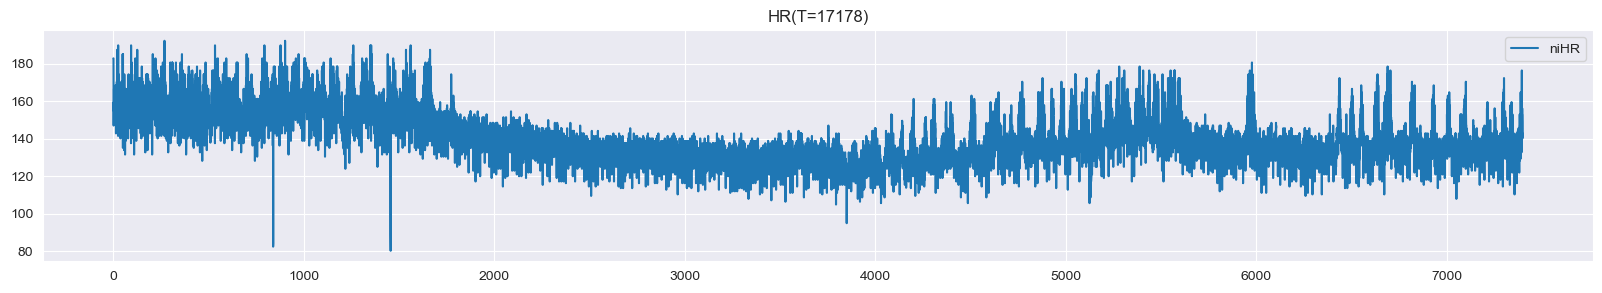

In [9]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_hr['Time'], df_hr['niHR'], label="niHR")
plt.legend()
plt.title("HR(T=17178)")
plt.show()

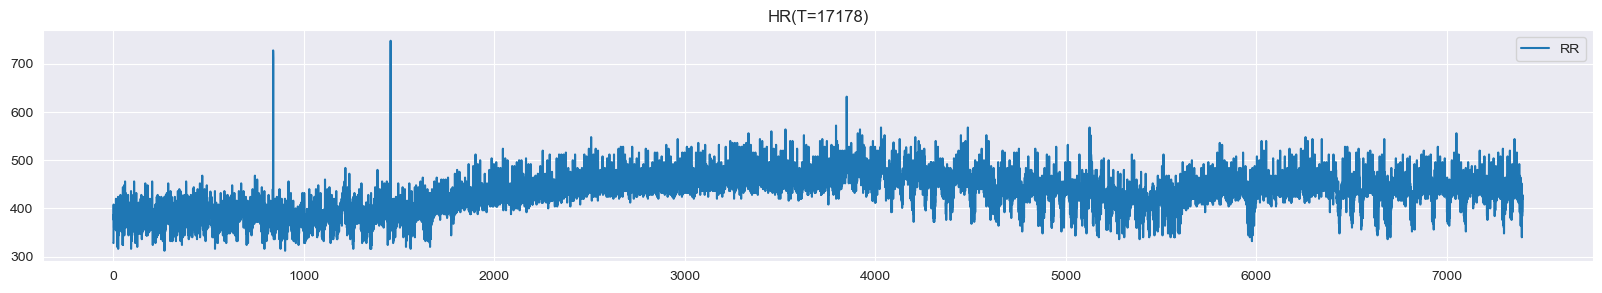

In [10]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_hr['Time'], df_hr['RR'], label="RR")
plt.legend()
plt.title("HR(T=17178)")
plt.show()

## Nadarawatson estimator 

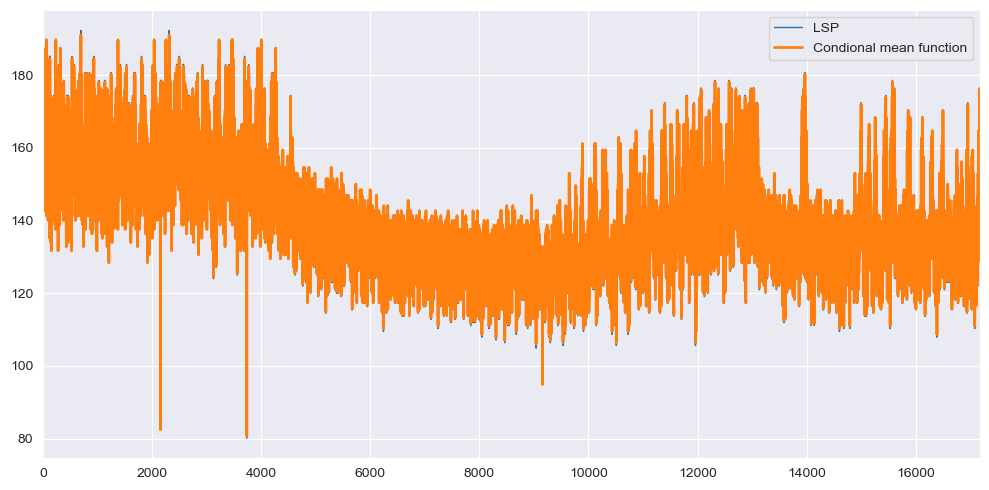

In [13]:
# C = 2
space_kernel = "gaussian" # "silverman"
time_kernel = "uniform"
T = df_hr.shape[0]
d = 1
bandwidth = T **(-0.4 / (d+1)) / 0.05
X_dict = df_hr['niHR'].values.reshape(-1,1) #df_malleco['Value'].diff().values.reshape(-1, 1)
X_tvar_2 = df_hr['niHR'].values #df_malleco['Value'].diff().values

GaussUnifKernel = Kernel(T=T, bandwidth=bandwidth, space_kernel=space_kernel, time_kernel=time_kernel)
GaussUnifKernel 
Y_t_T = df_hr['niHR'].values

weights = {}
for t in range(T):
    weights[str(t)] = GaussUnifKernel.fit(X_dict, t)
    
m_hat= [np.sum(weights[str(t)] * Y_t_T) for t in range(T)]

In [ ]:
path_fig = "/Users/mzalaya/Library/CloudStorage/Dropbox/research/git/wasslsp/figs/"
plt.rcParams["figure.figsize"] = (10,5)

u_var = np.linspace(0., 1., T)
plt.plot(X_tvar_2, lw=1, label="LSP")
plt.plot(np.array(m_hat), lw=2, label="Condional mean function")
plt.xlim(0, T)
plt.legend()
plt.tight_layout()
plt.savefig(path_fig+"locally_process_conditional_mean_Guassina_space_kernel_uniform_tiem_kernel.pdf", dpi=150)

In [12]:
np.mean(abs(np.array(m_hat) - X_tvar_2))

4.039687177162301e-05